## 分析电影数据集

此项目中，，使用 `NumPy`、`Pandas`、`matplotlib`、`seaborn` 库中的函数，来对电影数据集进行探索。

下载数据集：
[TMDb电影数据](https://s3.cn-north-1.amazonaws.com.cn/static-documents/nd101/explore+dataset/tmdb-movies.csv)


## 数据的导入与处理

使用 Pandas 读取数据，并进行预处理。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei'] #指定默认字体 SimHei为黑体
plt.rcParams['axes.unicode_minus']=False
movie_data = pd.read_csv('./tmdb-movies.csv')

---

**了解数据** 

读取数据之后，我们有必要通过一些简单的方法，来了解我们数据表是什么样子的。

1. 使用 `.head()`、`.tail()`、`.sample()` 方法，观察、了解数据表的情况。
2. 使用 `.dtypes` 属性，来查看各列数据的数据类型。
3. 使用 `isnull()` 配合 `.any()` 等方法，来查看各列是否存在空值。
4. 使用 `.describe()` 方法，看看数据表中数值型的数据是怎么分布的。

In [ ]:
movie_data.tail()
movie_data.sample()

movie_data.isnull().any()
display(movie_data.describe())
movie_data.dtypes

**清理数据 ** 

使用适当的方法来清理空值，并将得到的数据保存。

In [3]:
#通过info方法，看出关键的数字型字段都是非空的，director列有一很小部分缺失，考虑后面有对director进行分组分析的，这一小部分director没有
#值的行可以删除，再补充下电影类型，设为"Unknown"
#其余一些并不影响分析，可以不做处理
movie_data.dropna(subset=['director'],inplace=True)
movie_data["genres"] = movie_data["genres"].fillna("Unknown")
display(movie_data[movie_data['original_title'].duplicated(keep=False)])
movie_data.info()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
18,150689,tt1661199,5.556818,95000000,542351353,Cinderella,Lily James|Cate Blanchett|Richard Madden|Helen...,NaN,Kenneth Branagh,Midnight is just the beginning.,...,"When her father unexpectedly passes away, youn...",112,Romance|Fantasy|Family|Drama,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,3/12/15,1495,6.8,2015,8.739996e+07,4.989630e+08
46,228161,tt2224026,2.976436,135000000,368871007,Home,Jim Parsons|Rihanna|Steve Martin|Jennifer Lope...,http://www.meettheboov.com/,Tim Johnson,Worlds Collide,...,When Earth is taken over by the overly-confide...,94,Fantasy|Comedy|Animation|Science Fiction|Family,Twentieth Century Fox Film Corporation|DreamWo...,3/18/15,1060,6.9,2015,1.241999e+08,3.393612e+08
52,253412,tt2719848,2.798017,55000000,203427584,Everest,Jason Clarke|Jake Gyllenhaal|Josh Brolin|John ...,http://www.everestmovie.com/,Baltasar KormÃ¡kur,The Storm Awaits.,...,Inspired by the incredible events surrounding ...,121,Adventure|Drama,Universal Pictures|Working Title Films|Walden ...,9/10/15,1172,6.7,2015,5.059998e+07,1.871533e+08
54,257088,tt2058673,2.614499,105000000,133718711,Point Break,Edgar RamÃ­rez|Luke Bracey|Teresa Palmer|Delro...,https://www.facebook.com/PointBreakMovie,Ericson Core,The only law that matters is gravity,...,A young undercover FBI agent infiltrates a gan...,114,Action|Crime|Thriller,Studio Babelsberg|Alcon Entertainment|DMG Ente...,12/3/15,505,5.5,2015,9.659996e+07,1.230212e+08
61,166424,tt1502712,2.487042,120000001,167977596,Fantastic Four,Miles Teller|Kate Mara|Michael B. Jordan|Jamie...,http://www.fantasticfourmovie.com/,Josh Trank,Change is coming.,...,Four young outsiders teleport to a dangerous u...,100,Action|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Marv Fi...,8/5/15,1565,4.4,2015,1.104000e+08,1.545393e+08
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.000000e+00
71,276907,tt3569230,2.281350,25000000,42972994,Legend,Tom Hardy|Emily Browning|Christopher Eccleston...,https://www.uphe.com/movies/legend-2015,Brian Helgeland,"Love, fight, live, rule like a legend.",...,"Suave, charming and volatile, Reggie Kray and ...",131,Crime|Thriller,Working Title Films|Cross Creek Pictures|Anton...,9/9/15,619,6.7,2015,2.299999e+07,3.953514e+07
77,321741,tt3322364,2.121884,35000000,48623572,Concussion,Will Smith|Bitsie Tulloch|Gugu Mbatha-Raw|Alec...,http://www.sonypictures.com/movies/concussion/,Peter Landesman,Even Legends Need a Hero,...,A dramatic thriller based on the incredible tr...,123,Drama,Village Roadshow Pictures|Scott Free Productio...,11/12/15,500,6.9,2015,3.219999e+07,4.473367e+07
86,243688,tt1029360,1.984529,35000000,95437994,Poltergeist,Sam Rockwell|Rosemarie DeWitt|Saxon Sharbino|K...,NaN,Gil Kenan,They're Here. And They Know What Scares You.,...,Legendary filmmaker Sam Raimi and director Gil...,93,Horror|Thriller,Ghost House Pictures|Vertigo Entertainment|Met...,5/20/15,589,5.0,2015,3.219999e+07,8.780292e+07


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10822 entries, 0 to 10865
Data columns (total 21 columns):
id                      10822 non-null int64
imdb_id                 10816 non-null object
popularity              10822 non-null float64
budget                  10822 non-null int64
revenue                 10822 non-null int64
original_title          10822 non-null object
cast                    10752 non-null object
homepage                2926 non-null object
director                10822 non-null object
tagline                 8032 non-null object
keywords                9357 non-null object
overview                10819 non-null object
runtime                 10822 non-null int64
genres                  10822 non-null object
production_companies    9815 non-null object
release_date            10822 non-null object
vote_count              10822 non-null int64
vote_average            10822 non-null float64
release_year            10822 non-null int64
budget_adj              1


## 根据指定要求读取数据


相比 Excel 等数据分析软件，Pandas 的一大特长在于，能够轻松地基于复杂的逻辑选择合适的数据。因此，如何根据指定的要求，从数据表当获取适当的数据，是使用 Pandas 中非常重要的技能。

---

**简单读取 ** 

1. 读取数据表中名为 `id`、`popularity`、`budget`、`runtime`、`vote_average` 列的数据。
2. 读取数据表中前1～20行以及48、49行的数据。
3. 读取数据表中第50～60行的 `popularity` 那一列的数据。

要求：每一个语句只能用一行代码实现。

In [6]:
#1
movie_data[['id','popularity','budget','runtime','vote_average']]

#2
df1 = movie_data.iloc[list(range(0,20))+[47,48],:]

#3
df2 =  movie_data.iloc[49:60][['popularity']]

**逻辑读取**

1. 读取数据表中 **`popularity` 大于5** 的所有数据。
2. 读取数据表中 **`popularity` 大于5** 的所有数据且**发行年份在1996年之后**的所有数据。

In [7]:
#1
df_popularity = movie_data[movie_data.popularity>5]

#2
movie_data[(movie_data.popularity>5) & (movie_data.release_year > 1996)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

**分组读取 **

1. 对 `release_year` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `revenue` 的均值。
2. 对 `director` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `popularity` 的均值，从高到低排列。

In [8]:
#1
movie_data.groupby(['release_year']).agg({'revenue':'mean'})

#2
df = movie_data.groupby(['director']).agg({'popularity':'mean'}).sort_values(by='popularity', ascending = False)

## 绘图与可视化
根据需求，选择适当的可视化图像进行绘制

** 对 `popularity` 最高的20名电影绘制其 `popularity` 值 **

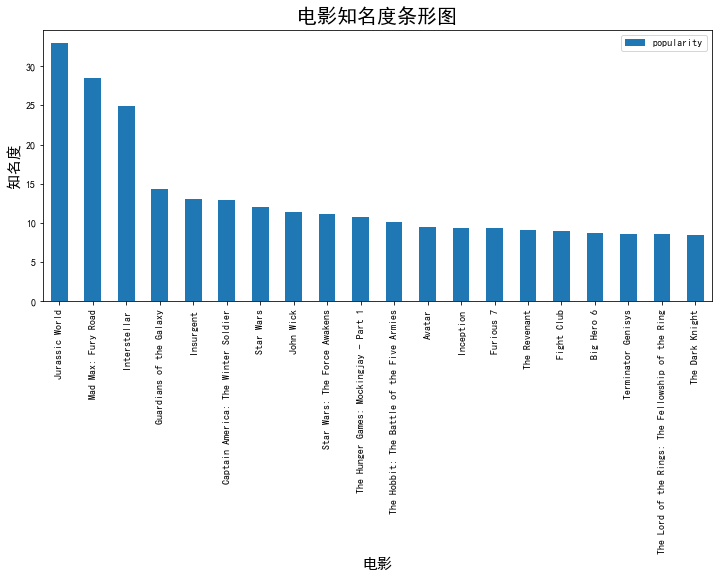

In [9]:
base_color = sb.color_palette()[0]
film_popularity = movie_data.sort_values(by=['popularity'],ascending = False)[:20]
film_popularity.plot.bar(x='original_title',y='popularity',figsize=(12,5),color = base_color)
plt.xlabel("电影", fontsize=15)
plt.ylabel("知名度", fontsize=15)
plt.title("电影知名度条形图",fontsize=20)

** 影净利润（票房-成本）随着年份变化的情况